In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [2]:
scale_factor = 8

In [3]:
hr_pil = Image.open('notebooks/data/czi/hr/sample_0.png')
lr_pil = Image.open('LR_demo/{}x/sample_0.png'.format(scale_factor))
sr_pil = Image.open('SR_demo/{}x/sample_0.png'.format(scale_factor))

In [4]:
hr = np.asarray(hr_pil)
lr = np.asarray(lr_pil)
sr = np.asarray(sr_pil)

In [5]:
hr.shape, lr.shape, sr.shape

((1024, 1024, 3), (128, 128, 3), (1024, 1024, 3))

In [6]:
ssim_val = ssim(hr, sr, data_range=sr.max() - hr.min(), multichannel=True)
ssim_val

0.820294733707304

Text(0.5, 1.0, 'predicted SR')

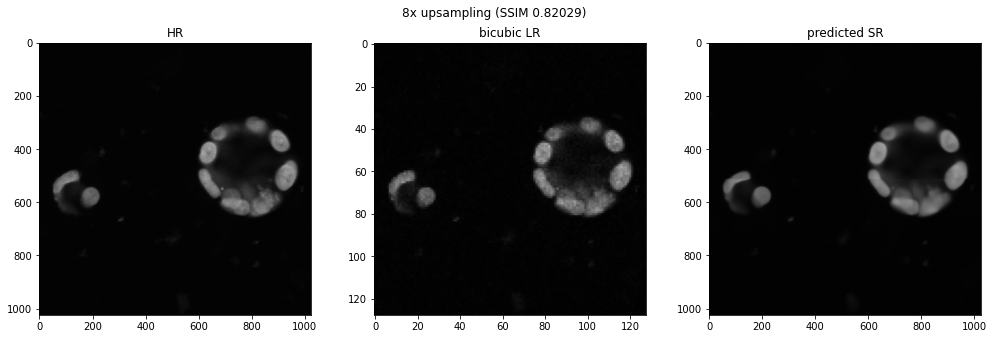

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5), gridspec_kw={'wspace': 0})
fig.suptitle('{}x upsampling (SSIM {})'.format(scale_factor, round(ssim_val, 5)))

ax1.imshow(hr)
ax1.set_title('HR')

ax2.imshow(lr)
ax2.set_title('bicubic LR')


ax3.imshow(sr)
ax3.set_title('predicted SR')

In [8]:
fig.savefig('figs/{}x_sample.png'.format(scale_factor), dpi=300, transparent=False)

### Zoom in crop

In [9]:
hr_rect = np.array([600, 200, 1000, 650])
lr_rect = hr_rect / scale_factor

In [10]:
hr_crop = hr_pil.crop(hr_rect)
lr_crop = lr_pil.crop(lr_rect)
sr_crop = sr_pil.crop(hr_rect)

In [11]:
hr_crop = np.asarray(hr_crop)
lr_crop = np.asarray(lr_crop)
sr_crop = np.asarray(sr_crop)

In [12]:
ssim_val_crop = ssim(hr_crop, sr_crop, data_range=sr_crop.max() - hr_crop.min(), multichannel=True)
ssim_val_crop

0.6743748570972756

Text(0.5, 1.0, 'predicted SR')

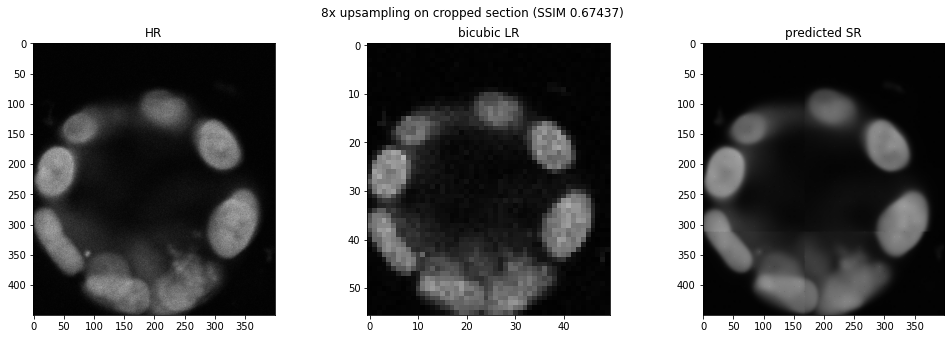

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5), gridspec_kw={'wspace': 0})
fig.suptitle('{}x upsampling on cropped section (SSIM {})'.format(scale_factor, round(ssim_val_crop, 5)))

ax1.imshow(hr_crop)
ax1.set_title('HR')

ax2.imshow(lr_crop)
ax2.set_title('bicubic LR')


ax3.imshow(sr_crop)
ax3.set_title('predicted SR')

In [14]:
fig.savefig('figs/{}x_sample_crop.png'.format(scale_factor), dpi=300, transparent=False)